# Gradient Descent

How deep learning models learn:

1. Guess a solution
2. Compute the error (mistakes)
3. Learn from mistakes and modify the parameters

## Local Minima

Possibilities of occurance

* It is possible that there are many good solutions (many equally good local minima). This interpretation is consistent with the huge diversity of weight configurations that produce similar model performance.
* Another possibility is that there are extremely few local minima in high-dimensional space. This interpretation is consistent with the complexity and absurd dimensionality of DL models.

Saddle point:

* When function has local minimum in one direction and local maximum in other direction

Possible solutions:

* Re-train the model many times using different random weights (different starting locations on the loss landscape) and pick the model that does best
* Increase the dimensionality (complexity) od the model to have fewer local minima

## Gradient descent in 1D

In [47]:
import numpy as np
import matplotlib.pyplot as plt

from IPython import display
display.set_matplotlib_formats('svg')

/tmp/ipython-input-47-2884596146.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [48]:
def fx(x):
  return 3*x**2 - 3*x + 4

# derivative func
def deriv(x):
  return 6*x - 3

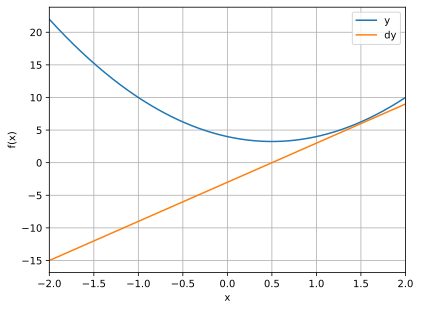

In [49]:
# plot the function and its derivative
import numpy as np
import matplotlib.pyplot as plt
# define a range for x
x = np.linspace(-2, 2, 2001)

# plotting
plt.plot(x,fx(x),x,deriv(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

Method 1

In [50]:
# random starting point
localmin = np.random.choice(x,1)
print('first estimate:',localmin)

# learning parameters
learning_rate = 0.003
training_epochs = 500

# run through training
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad

localmin

first estimate: [-0.272]


array([0.49991223])

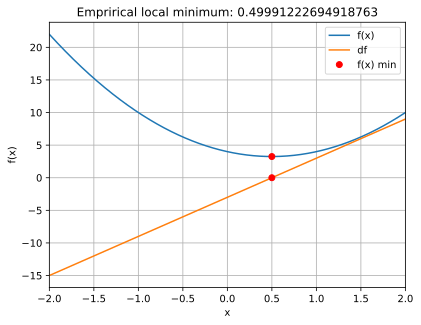

In [51]:
# plot results
plt.plot(x, fx(x), x, deriv(x))
plt.plot(localmin, deriv(localmin), 'ro')
plt.plot(localmin, fx(localmin), 'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Emprirical local minimum: %s'%localmin[0])
plt.show()

Method 2 (with params_hisotry or trajectory)

In [52]:
# random starting point
localmin = np.random.choice(x,1).item()

# learning params
learning_rate = 0.01
training_epochs = 100

# run through training and store all the results
modelparams = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad
  modelparams[i,:] = [localmin,grad]

In [53]:
modelparams

array([[0.79892   , 1.908     ],
       [0.7809848 , 1.79352   ],
       [0.76412571, 1.6859088 ],
       [0.74827817, 1.58475427],
       [0.73338148, 1.48966902],
       [0.71937859, 1.40028887],
       [0.70621587, 1.31627154],
       [0.69384292, 1.23729525],
       [0.68221235, 1.16305753],
       [0.67127961, 1.09327408],
       [0.66100283, 1.02767764],
       [0.65134266, 0.96601698],
       [0.6422621 , 0.90805596],
       [0.63372637, 0.8535726 ],
       [0.62570279, 0.80235825],
       [0.61816062, 0.75421675],
       [0.61107099, 0.70896375],
       [0.60440673, 0.66642592],
       [0.59814232, 0.62644037],
       [0.59225378, 0.58885394],
       [0.58671856, 0.55352271],
       [0.58151544, 0.52031135],
       [0.57662452, 0.48909266],
       [0.57202705, 0.4597471 ],
       [0.56770542, 0.43216228],
       [0.5636431 , 0.40623254],
       [0.55982451, 0.38185859],
       [0.55623504, 0.35894707],
       [0.55286094, 0.33741025],
       [0.54968928, 0.31716563],
       [0.

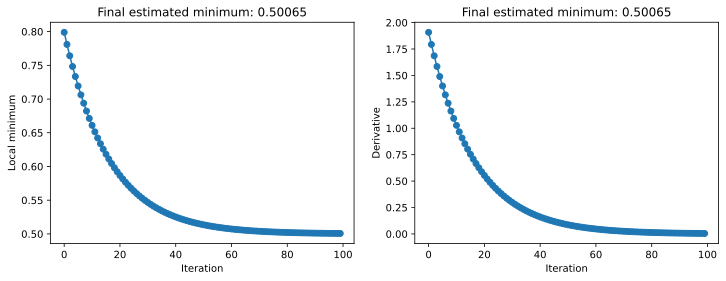

In [54]:
# plot the gradient over iterations
fig, ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
  ax[i].plot(modelparams[:,i],'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Final estimated minimum: {localmin:.5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()

As we can see firstly we get low estimate -1.5 in local minima which is very low derivative -14. Then gradually we go to 0.5 local minima which is actual minima, and derivative = 0.

With early stopping

In [55]:
# random starting point
localmin = np.random.choice(x,1).item()

# learning params
learning_rate = 0.01
training_epochs = 100

# run through training and store all the results
modelparams = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad
  modelparams[i,:] = [localmin,grad]
  if abs(grad) < 0.1: # form of early stopping (if grad is lower than threshold)
    break

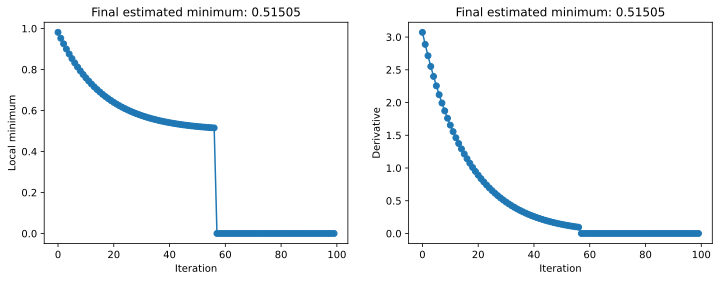

In [56]:
# plot the gradient over iterations
fig, ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
  ax[i].plot(modelparams[:,i],'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Final estimated minimum: {localmin:.5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()

## Playground

In [57]:
from sympy import *

x = symbols('x')

In [58]:
import numpy as np
import matplotlib.pyplot as plt

from IPython import display
display.set_matplotlib_formats('svg')

def fx(x):
  return np.cos(2*np.pi*x)+x**2

# derivative func
def deriv(x):
  # return diff(x)
  return -2*np.pi*np.sin(2*np.pi*x) + 2*x

/tmp/ipython-input-58-882629868.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


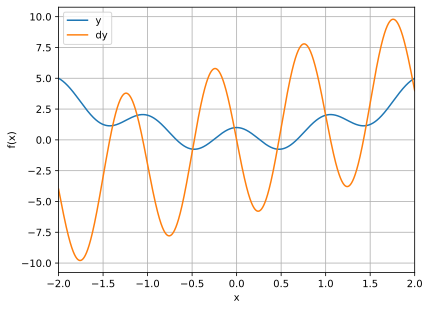

In [59]:
# plot the function and its derivative
import numpy as np
import matplotlib.pyplot as plt
# define a range for x
x = np.linspace(-2, 2, 2001)

# plotting
plt.plot(x,fx(x),x,deriv(x))
plt.xlim(x[[-0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

In [60]:
# start at 0
localmin = np.array([0.000000001])
print('first estimate:',localmin)

# learning parameters
learning_rate = 0.01
training_epochs = 100

# run through training
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad

localmin

first estimate: [1.e-09]


array([0.47580245])

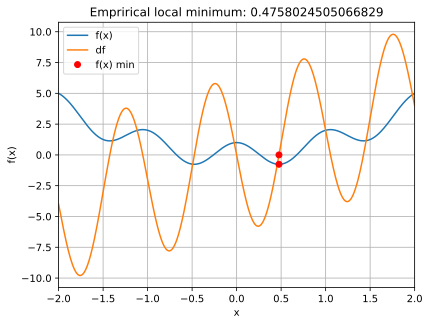

In [61]:
# plot results
plt.plot(x, fx(x), x, deriv(x))
plt.plot(localmin, deriv(localmin), 'ro')
plt.plot(localmin, fx(localmin), 'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Emprirical local minimum: %s'%localmin[0])
plt.show()

If we start from 0 not random we have confidence in quantifying local maximum actually instead of minimum since derivative in maximum is also 0.

## Gradient descent in 2D

In [62]:
# import all modules
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

from IPython import display
display.set_matplotlib_formats('svg')

/tmp/ipython-input-62-3746564756.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [63]:
def peaks(x,y):
  # expand to a 2D mesh
  x,y = np.meshgrid(x,y)

  z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) - 1/3*np.exp(-(x+1)**2 - y**2)
  return z

In [64]:
# create the landscape
x = np.linspace(-3,3,201)
y = np.linspace(-3,3,201)

Z = peaks(x,y)
Z

array([[ 6.67128030e-05,  7.80560110e-05,  9.11285637e-05, ...,
        -1.10072740e-05, -8.12540937e-06, -5.86418787e-06],
       [ 7.44098587e-05,  8.70562104e-05,  1.01628880e-04, ...,
        -1.26066409e-05, -9.31672000e-06, -6.73422472e-06],
       [ 8.28342576e-05,  9.69069039e-05,  1.13121364e-04, ...,
        -1.43539924e-05, -1.06138222e-05, -7.67727707e-06],
       ...,
       [ 4.09596850e-05,  4.92755478e-05,  5.91610036e-05, ...,
         7.59458996e-05,  6.38097713e-05,  5.35195228e-05],
       [ 3.63885020e-05,  4.37619528e-05,  5.25247799e-05, ...,
         6.65826633e-05,  5.59348255e-05,  4.69077633e-05],
       [ 3.22353596e-05,  3.87554812e-05,  4.65022631e-05, ...,
         5.82550103e-05,  4.89323108e-05,  4.10297275e-05]])

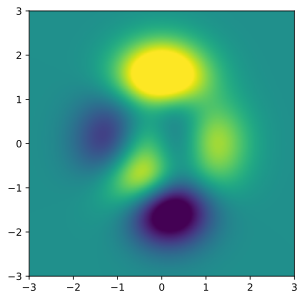

In [65]:
plt.imshow(Z, extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.show()

In [66]:
# create derivative functions using sympy

sx, sy = sym.symbols('sx,sy')

sZ = 3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) - 1/3*sym.exp(-(sx+1)**2 - sy**2)

# create functions from the sympy-computed derivatives
df_x = sym.lambdify( (sx,sy),sym.diff(sZ,sx),'sympy' )
df_y = sym.lambdify( (sx,sy),sym.diff(sZ,sy),'sympy' )

df_x(1,1).evalf() # partial derivative of the function with respect to x in (1,1)

-1.07369833656079

In [67]:
df_y(1,1).evalf() # partial derivative of the function with respect to y in (1,1)

1.89918592997863

so function derivative in (1,1) will point into (-1.07, 1.899) direction.

In [68]:
# random starting point (uniform between -2 and +2)
localmin = np.random.rand(2)*4-2 # also try specifying coordinates
startpnt = localmin[:]

learning_rate = 0.01
training_epochs = 1000

trajectory = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = np.array([ df_x(localmin[0],localmin[1]).evalf(),
                    df_y(localmin[0],localmin[1]).evalf()
                  ])
  localmin = localmin - learning_rate*grad
  trajectory[i,:] = localmin

print(localmin)
print(startpnt)

[-1.34739624436821 0.204518866097005]
[-0.47870744 -0.12036992]


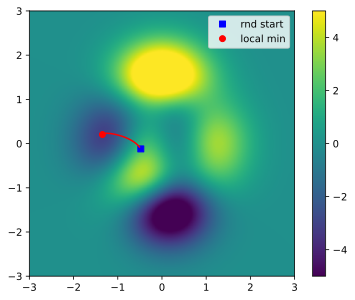

In [69]:
plt.imshow(Z, extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.plot(startpnt[0],startpnt[1],'bs')
plt.plot(localmin[0],localmin[1],'ro')
plt.plot(trajectory[:,0],trajectory[:,1],'r')
plt.legend(['rnd start', 'local min'])
plt.colorbar()
plt.show()

### Gradient Ascend

/tmp/ipython-input-70-4114728136.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


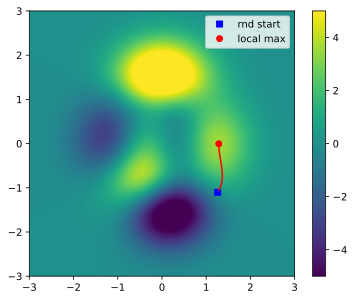

In [70]:
# import all modules
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

from IPython import display
display.set_matplotlib_formats('svg')

def peaks(x,y):
  # expand to a 2D mesh
  x,y = np.meshgrid(x,y)

  z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) - 1/3*np.exp(-(x+1)**2 - y**2)
  return z

x = np.linspace(-3,3,201)
y = np.linspace(-3,3,201)

Z = peaks(x,y)

# create derivative functions using sympy
sx, sy = sym.symbols('sx,sy')
sZ = 3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) - 1/3*sym.exp(-(sx+1)**2 - sy**2)

# create functions from the sympy-computed derivatives
df_x = sym.lambdify( (sx,sy),sym.diff(sZ,sx),'sympy' )
df_y = sym.lambdify( (sx,sy),sym.diff(sZ,sy),'sympy' )

# random starting point (uniform between -2 and +2)
localmax = np.random.rand(2)*4-2 # also try specifying coordinates
startpnt = localmax[:]

learning_rate = 0.01
training_epochs = 1000

trajectory = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = np.array([ df_x(localmax[0],localmax[1]).evalf(),
                    df_y(localmax[0],localmax[1]).evalf()
                  ])
  localmax = localmax + learning_rate*grad
  trajectory[i,:] = localmax

plt.imshow(Z, extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.plot(startpnt[0],startpnt[1],'bs')
plt.plot(localmax[0],localmax[1],'ro')
plt.plot(trajectory[:,0],trajectory[:,1],'r')
plt.legend(['rnd start', 'local max'])
plt.colorbar()
plt.show()

## Parametric experiments on Gradient Descent

In [71]:
import numpy as np
import matplotlib.pyplot as plt

from IPython import display
display.set_matplotlib_formats('svg')

/tmp/ipython-input-71-2884596146.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


### Experiments to understand Gradient Descent

In [72]:
# the function
x = np.linspace(-2*np.pi,2*np.pi,401)
fx = np.sin(x) * np.exp(-x**2*.05)

# and its derivative
df = np.cos(x)*np.exp(-x**2*.05)+np.sin(x)*(-.1*x)*np.exp(-x**2*.05)

x.shape, fx.shape, df.shape

((401,), (401,), (401,))

Zauważ, że robimy poprostu zwykłe działania tak jak na jednej liczbie x, tylko na matrycy ale praktycznie nic sie nie zmienia, kazda liczba w matrycy zachowuje sie jak pojedyncza liczba tylko umieszczamy je w matrycy.

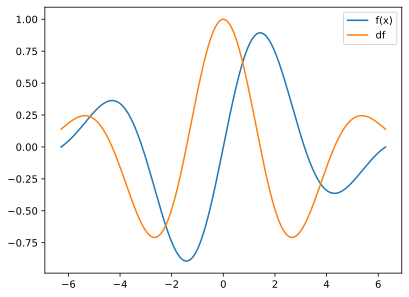

In [73]:
# quick plot for inspection
plt.plot(x, fx, x, df)
plt.legend(['f(x)','df'])

In [74]:
# function (note: over-writing variable names)
def fx(x):
  return np.sin(x)*np.exp(-x**2*.05)

# derivative function
def deriv(x):
  return np.cos(x)*np.exp(-x**2*.05) - np.sin(x)*.1*x*np.exp(-x**2*.05)

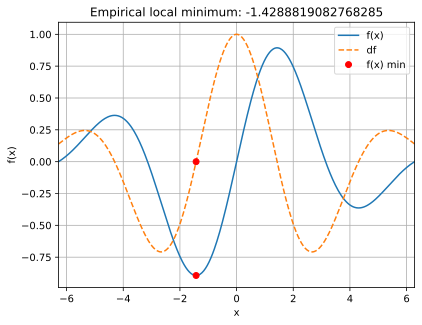

In [75]:
# random starting point
localmin = np.random.choice(x,1) # np.array([6])

# learning parameters
learning_rate = .01
training_epochs = 1000

# run through training
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate * grad


# plot the results
plt.plot(x, fx(x), x, deriv(x), '--')
plt.plot(localmin, deriv(localmin), 'ro')
plt.plot(localmin, fx(localmin), 'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()

### Run parametric experiments

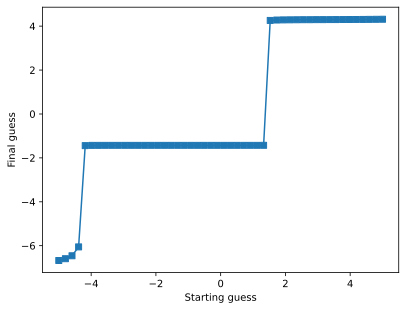

In [76]:
# Experiment 1: systematically varying the starting locations

startlocs = np.linspace(-5, 5, 50)
finalres = np.zeros(len(startlocs))

# loop over starting points
for idx, localmin in enumerate(startlocs):

  # run through training
  for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate*grad

  # store the final guess
  finalres[idx] = localmin

# plot the results
plt.plot(startlocs, finalres, 's-')
plt.xlabel('Starting guess')
plt.ylabel('Final guess')
plt.show()

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import sympy as sym
from IPython import display

x = sym.symbols('x')
fx = sym.sin(x) * sym.exp(-x**2*.05)
fx

exp(-0.05*x**2)*sin(x)

In [78]:
dfx = sym.diff(fx, x)
dfx

-0.1*x*exp(-0.05*x**2)*sin(x) + exp(-0.05*x**2)*cos(x)

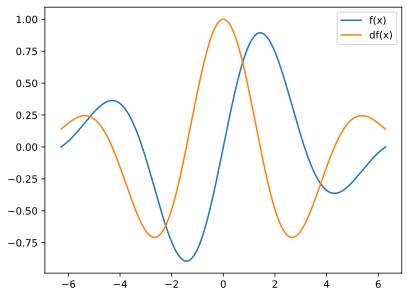

In [79]:
x = np.linspace(-2*np.pi, 2*np.pi, 401)

fx = np.exp(-0.05*x**2)*np.sin(x)
dfx = -0.1*x*np.exp(-0.05*x**2)*np.sin(x)+np.exp(-0.05*x**2)*np.cos(x)

plt.plot(x,fx,x,dfx)
plt.legend(['f(x)','df(x)'])
plt.show()

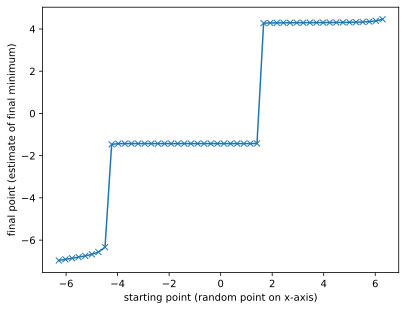

In [80]:
def f(x):
  return np.exp(-0.05*x**2)*np.sin(x)

def df(x):
  return -0.1*x*np.exp(-0.05*x**2)*np.sin(x)+np.exp(-0.05*x**2)*np.cos(x)

startpnt = np.linspace(-2*np.pi,2*np.pi,50)
final = np.zeros(len(startpnt))

lr = 0.01
epochs = 1000

for i, localmin in enumerate(startpnt):
  for epoch in range(epochs):
    grad = df(localmin)
    localmin = localmin - lr*grad

  final[i] = localmin

plt.plot(startpnt, final, 'x-')
plt.xlabel('starting point (random point on x-axis)')
plt.ylabel('final point (estimate of final minimum)')
plt.show()

Above plot shows in which $x$ localmin falls. But if we want to check where localmin is picked with respect to $y$, so where the actual local min is we need to change plot from $final$ into $f(final)$.

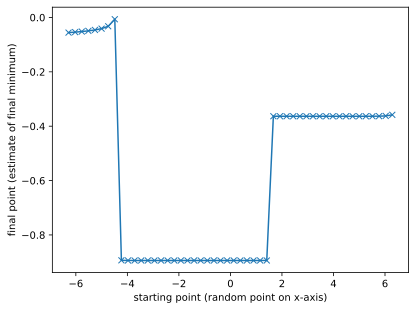

In [81]:
plt.plot(startpnt, f(final), 'x-')
plt.xlabel('starting point (random point on x-axis)')
plt.ylabel('final point (estimate of final minimum)')
plt.show()

Text(0.5, 1.0, 'Empirical localmin: -1.425126277831993')

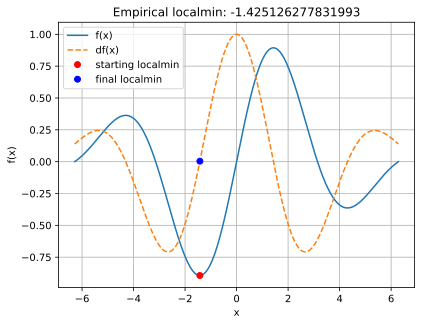

In [82]:
localmin = 1.4
lr = 0.01
epochs = 1000

for epoch in range(epochs):
  grad = df(localmin)
  localmin = localmin - lr * grad

plt.plot(x, fx, x, dfx,'--')
plt.plot(localmin, f(localmin), 'ro')
plt.plot(localmin, df(localmin), 'bo')
plt.grid()
plt.ylabel('f(x)')
plt.xlabel('x')
plt.legend(['f(x)','df(x)','starting localmin','final localmin'])
plt.title('Empirical localmin: %s'%localmin)

Text(0, 0.5, 'Final guess')

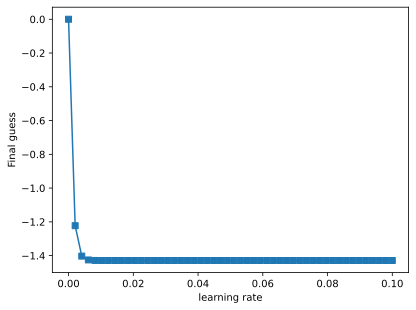

In [83]:
# Experiment 2: systematically varying the learning rate

learningrates = np.linspace(1e-10, 1e-1, 50)
finalres = np.zeros(len(learningrates))

# loop over learning rates
for idx, learningRate in enumerate(learningrates):
  # force starting guess to 0
  localmin = 0

  # run through training
  for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learningRate*grad

  # store the final guess
  finalres[idx] = localmin

plt.plot(learningrates, finalres, 's-')
plt.xlabel('learning rate')
plt.ylabel('Final guess')

Text(0, 0.5, 'final minimum')

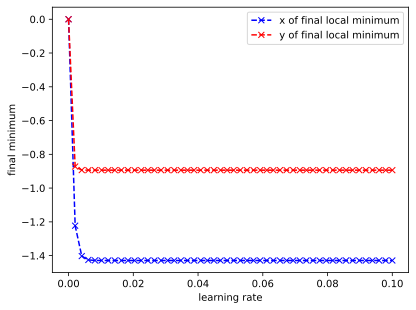

In [84]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return np.exp(-0.05*x**2)*np.sin(x)

def df(x):
  return -0.1*x*np.exp(-0.05*x**2)*np.sin(x)+np.exp(-0.05*x**2)*np.cos(x)

learning_rates = np.linspace(1e-10, 1e-1, 50)
final_min = np.zeros(len(learning_rates))
epochs = 1000

for i, lr in enumerate(learning_rates):
  localmin = 0
  for epoch in range(epochs):
    grad = df(localmin)
    localmin = localmin - lr*grad

  final_min[i] = localmin

plt.plot(learning_rates, final_min, '--bx')
plt.plot(learning_rates, f(final_min), '--rx')
plt.legend(['x of final local minimum', 'y of final local minimum'])
plt.xlabel('learning rate')
plt.ylabel('final minimum')

In [85]:
# Experiment 3: Interation between learning rate and training epochs

# setup parameters
learningrates = np.linspace(1e-10, 1e-1, 50)
training_epochs = np.round(np.linspace(10,1000,40))

# initialize matrix to store results
finalres = np.zeros((len(learningrates), len(training_epochs)))

# loop over learning rates
for Lidx, learningRate in enumerate(learningrates):

  # loop over training epochs
  for Eidx, trainEpochs in enumerate(training_epochs):

    # run through training (again fixing starting location)
    localmin = 1.6

    for i in range(int(trainEpochs)):
      grad = deriv(localmin)
      localmin = localmin - learningRate*grad

    # store the final guess
    finalres[Lidx,Eidx] = localmin

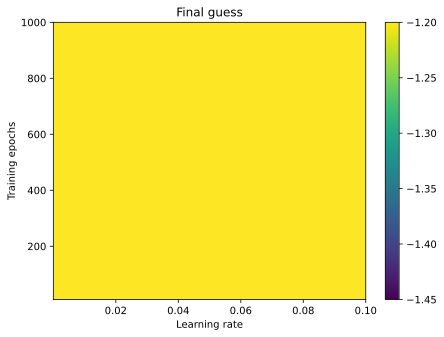

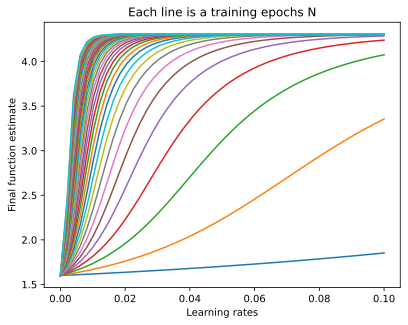

In [86]:
# plot the results

fig, ax = plt.subplots(figsize=(7,5))

plt.imshow(finalres,
           extent=[learningrates[0],
                             learningrates[-1],
                             training_epochs[0],
                             training_epochs[-1]],
           aspect='auto',
           origin='lower',
           vmin=-1.45,
           vmax=-1.2)

plt.xlabel('Learning rate')
plt.ylabel('Training epochs')
plt.title('Final guess')
plt.colorbar()
plt.show()

# another viz
plt.plot(learningrates, finalres)
plt.xlabel('Learning rates')
plt.ylabel('Final function estimate')
plt.title('Each line is a training epochs N')
plt.show()

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from IPython import display

def f(x):
  return np.exp(-0.05*x**2)*np.sin(x)

def df(x):
  return -0.1*x*np.exp(-0.05*x**2)*np.sin(x)+np.exp(-0.05*x**2)*np.cos(x)

learning_rates = np.linspace(1e-10, 1e-1, 50)
epoch_ranges = np.round(np.linspace(10, 500, 40))

final_mins = np.zeros((len(learning_rates), len(epoch_ranges)))

for idx_lr, lr in enumerate(learning_rates):
  for idx_epoch, epochs in enumerate(epoch_ranges):
    localmin = 0
    for epoch in range(int(epochs)):
      grad = df(localmin)
      localmin = localmin - lr*grad

    final_mins[idx_lr, idx_epoch] = localmin

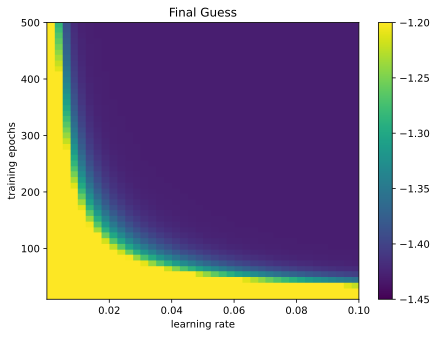

In [88]:
fig, ax = plt.subplots(figsize = (7,5))
plt.imshow(final_mins, extent = [learning_rates[0], learning_rates[-1], epoch_ranges[0], epoch_ranges[-1]], aspect='auto',origin='lower', vmin=-1.45, vmax= -1.2)
plt.xlabel('learning rate')
plt.ylabel('training epochs')
plt.title('Final Guess')
plt.colorbar()
plt.show()

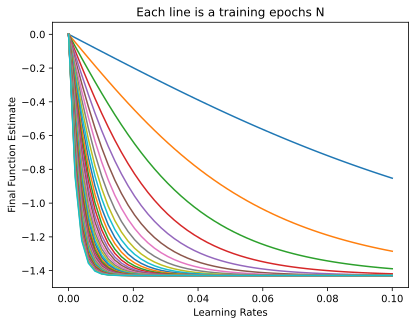

In [89]:
plt.plot(learning_rates, final_mins)
plt.xlabel('Learning Rates')
plt.ylabel('Final Function Estimate')
plt.title('Each line is a training epochs N')
plt.show()

### Fixed vs. dynamic learning rate

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

def f(x):
  return 3*x**2 - 3*x + 4

def df(x):
  return 6*x - 3

x = np.linspace(-2,2,500)
localmin = np.random.choice(x,1)
initval = localmin[:]
learning_rate = 0.01
epochs = 500

#### Fixed lr

In [91]:
paramsFixed = np.zeros((epochs, 3))
localmin = initval[:]
for epoch in range(epochs):
  grad = df(localmin)
  lr = learning_rate # constant learning_rate
  localmin = localmin - lr * grad
  paramsFixed[epoch,:] = localmin[0], grad[0], lr

#### Gradient-based lr

In [92]:
paramsGrad = np.zeros((epochs, 3))
localmin = initval[:]
for epoch in range(epochs):
  grad = df(localmin)
  lr = learning_rate * abs(grad) # dynamic learning rate wrt grad, if grad is higher it means, there is a higher slope and we want to make bigger steps and if it's lower slope we are closer so we want to make smaller steps
  localmin = localmin - lr*grad
  paramsGrad[epoch,:] = localmin[0], grad[0], lr[0]

#### Time-based lr

In [93]:
paramsTime = np.zeros((epochs, 3))
localmin = initval[:]
for epoch in range(epochs):
  grad = df(localmin)
  lr = learning_rate * (1 - (epoch+1)/epochs) # the higher epoch the lower learning_rate we take
  localmin = localmin - lr*grad
  paramsTime[epoch,:] = localmin[0], grad[0], lr

#### Viz

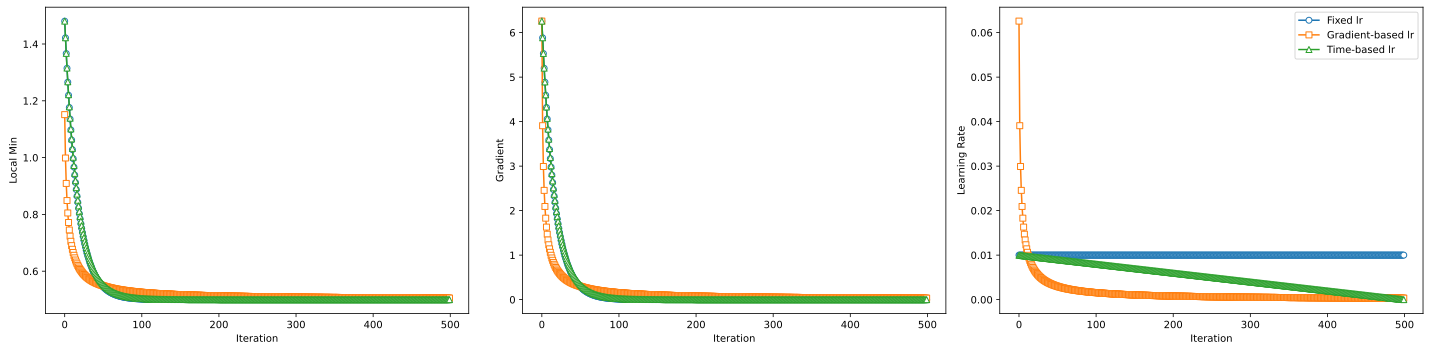

In [94]:
fig, ax = plt.subplots(1,3,figsize=(20,5))

for i in range(3):
  ax[i].plot(paramsFixed[:,i], '-o', markerfacecolor='w')
  ax[i].plot(paramsGrad[:,i], '-s', markerfacecolor='w')
  ax[i].plot(paramsTime[:,i], '-^', markerfacecolor='w')
  ax[i].set_xlabel('Iteration')

ax[0].set_ylabel('Local Min')
ax[1].set_ylabel('Gradient')
ax[2].set_ylabel('Learning Rate')
ax[2].legend(['Fixed lr', 'Gradient-based lr', 'Time-based lr'])

plt.tight_layout()
plt.show()

In [95]:
paramsTime[-1].mean()

np.float64(0.1666672302679246)